In [75]:

%run load-gapminder_df.ipynb
%who

KernelDensity	 MinMaxScaler	 X	 X_plot	 angle_between	 ax	 both_RGB_hex	 categorical_accessor	 conjunctify_list	 
create_binned_categories	 data_folder	 df	 df_cut	 download_url	 encoding	 euclidean	 fig	 formal_name_dict	 
gapminder_df	 get_min_max	 high_RGB_hex	 hist_series	 informal_name_dict	 kde_df	 load_object	 low_RGB_hex	 norm	 
np	 number_column_list	 obj_path	 os	 pd	 pdist	 pickle	 plt	 polygon_list	 
round_down	 round_up	 saves_folder	 sns	 squareform	 store_objects	 true_dens	 unit_vector	 x	 
xlim	 


In [120]:

def get_func_args(func):
    print(func.__code__.co_varnames[:func.__code__.co_argcount])
    if func.__doc__ is not None:
        print(func.__doc__)

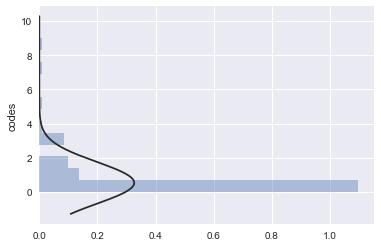

In [121]:

import seaborn as sns
import numpy as np
from scipy.stats import norm

sns.set()
df = gapminder_df[['income_per_person']].dropna().copy()
df_cut = pd.cut(x=df['income_per_person'], bins=10)
df['codes'] = df_cut.cat.codes
ax = sns.distplot(df['codes'], hist=True, norm_hist=True, fit=norm, kde=False, vertical=True)

In [137]:

print(sns.distplot.__doc__)

Flexibly plot a univariate distribution of observations.

    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.

    Parameters
    ----------

    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot a (normed) histogram.
    kde : bool, optional
        Whether to plot a gaussian kernel density estimate.
    rug : bool, optional
        Whether to draw a rugplot on the support axis.
    fit : random variable object, optional
        An object with `fit` method, returning a

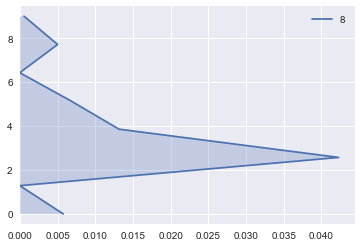

In [135]:

fig, ax = plt.subplots()
ax = sns.kdeplot(data=df['codes'], shade=True, vertical=True, kernel='gau', ax=ax, label=len(df['codes'].unique()), gridsize=len(df['codes'].unique()))

In [136]:

get_func_args(sns.kdeplot)

('data', 'data2', 'shade', 'vertical', 'kernel', 'bw', 'gridsize', 'cut', 'clip', 'legend', 'cumulative', 'shade_lowest', 'cbar', 'cbar_ax', 'cbar_kws', 'ax')
Fit and plot a univariate or bivariate kernel density estimate.

    Parameters
    ----------
    data : 1d array-like
        Input data.
    data2: 1d array-like, optional
        Second input data. If present, a bivariate KDE will be estimated.
    shade : bool, optional
        If True, shade in the area under the KDE curve (or draw with filled
        contours when data is bivariate).
    vertical : bool, optional
        If True, density is on x-axis.
    kernel : {'gau' | 'cos' | 'biw' | 'epa' | 'tri' | 'triw' }, optional
        Code for shape of kernel to fit with. Bivariate KDE can only use
        gaussian kernel.
    bw : {'scott' | 'silverman' | scalar | pair of scalars }, optional
        Name of reference method to determine kernel size, scalar factor,
        or scalar for each dimension of the bivariate plot.
  

In [ ]:

%matplotlib inline

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0]) +
             0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
polygon = ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
                  label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    line_2d = ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
                      label="kernel = '{0}'".format(kernel))

text = ax.text(6, 0.38, "N={0} points".format(N))

legend = ax.legend(loc='upper left')
line_2d = ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

xlim = ax.set_xlim(-4, 9)
ylim = ax.set_ylim(-0.02, 0.4)

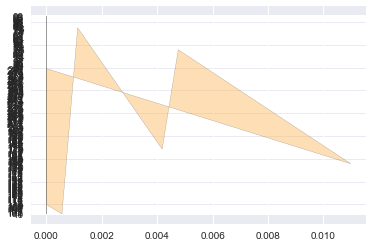

In [103]:

%matplotlib inline

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Plot a 1D density example
X = df['codes'].values.reshape(-1, 1)

X_plot = df.index.to_native_types()[:, np.newaxis]

fig, ax = plt.subplots()

# Cool color list at https://xkcd.com/color/rgb/
both_RGB_hex = '#fdb147'
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
log_dens = kde.score_samples(X_plot)
polygon_list = ax.fill(np.exp(log_dens), X_plot[:, 0], fc=both_RGB_hex, ec='black', alpha=0.4)
low_RGB_hex = '#327FCE'

In [98]:

X

array(['4', '5', '7', '8', '10', '11', '12', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '32', '33', '34', '35', '36', '37', '38', '39', '41', '42',
       '44', '45', '48', '49', '50', '51', '53', '54', '55', '56', '57',
       '58', '61', '62', '63', '64', '67', '68', '69', '70', '71', '73',
       '74', '83', '84', '85', '88', '89', '90', '91', '92', '94', '95',
       '96', '99', '101', '102', '103', '104', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '116', '117', '119', '120',
       '122', '124', '125', '126', '128', '130', '132', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '144',
       '145', '146', '147', '148', '149', '150', '151', '153', '154',
       '156', '157', '158', '159', '160', '161', '163', '164', '167',
       '169', '170', '173', '175', '176', '177', '182', '183', '186',
       '187', '188', '189', '190', '191', '192', '194', '195', '1

ValueError: x and y must have same first dimension, but have shapes (191,) and (10,)

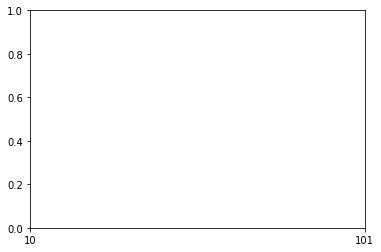

In [28]:

# I'm trying to make this look something like https://upload.wikimedia.org/wikipedia/commons/8/80/ANOVA_fair_fit.jpg
%matplotlib inline

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Plot a 1D density example
df = gapminder_df[['income_per_person']].dropna().copy()
df_cut = pd.cut(x=df['income_per_person'], bins=10)
df['codes'] = df_cut.cat.codes
X = df['codes']

X_plot = df.index.to_native_types()[:, np.newaxis]

true_dens = df['codes'].value_counts(sort=False)

fig, ax = plt.subplots()
polygon = ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
                  label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    line_2d = ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
                      label="kernel = '{0}'".format(kernel))

text = ax.text(6, 0.38, "N={0} points".format(N))

legend = ax.legend(loc='upper left')
line_2d = ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

xlim = ax.set_xlim(-4, 9)
ylim = ax.set_ylim(-0.02, 0.4)

In [71]:

%pprint

df_cut.value_counts(sort=False)

Pretty printing has been turned OFF


(-1.268, 10608.142]        145
(10608.142, 21112.508]      18
(21112.508, 31616.874]      13
(31616.874, 42121.241]      11
(42121.241, 52625.607]       1
(52625.607, 63129.973]       1
(63129.973, 73634.339]       0
(73634.339, 84138.705]       1
(84138.705, 94643.072]       0
(94643.072, 105147.438]      1
Name: income_per_person, dtype: int64

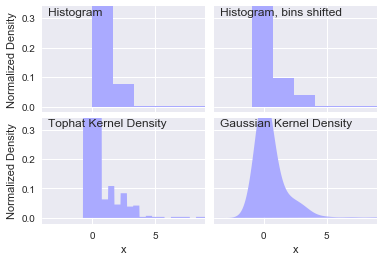

In [148]:

# Plot the progression of histograms to kernels
X = df['codes'][:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
hist1_array = ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', normed=True)
hist1_Text = ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
hist2_array = ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', normed=True)
hist2_Text = ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
tophat_polygon = ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
tophat_Text = ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
gaussian_polygon = ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
gaussian_Text = ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    line_2d = axi.plot(X[:, 0], np.zeros(X.shape[0]) - 0.01, '+k')
    xlim_tuple = axi.set_xlim(-4, 9)
    ylim_tuple = axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    ylabel_Text = axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    xlabel_Text = axi.set_xlabel('x')

In [2]:

import sys

print(sys.prefix)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6


In [4]:

!pip3 install ~/joypy/

Processing /Users/davebabbitt/joypy
    100% |████████████████████████████████| 13.2MB 114kB/s ta 0:00:011
    100% |████████████████████████████████| 16.7MB 91kB/s eta 0:00:011
    100% |████████████████████████████████| 14.9MB 102kB/s ta 0:00:011
  Using cached cycler-0.10.0-py2.py3-none-any.whl
  Using cached pytz-2017.3-py2.py3-none-any.whl
  Using cached pyparsing-2.2.0-py2.py3-none-any.whl
  Running setup.py install for joypy ... done


In [5]:

import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

In [6]:

%matplotlib inline
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()


fig, axes = joypy.joyplot(iris)

ModuleNotFoundError: No module named 'sklearn'